# Case Ifood
*Desenvolvido por Mário de Deus*

# Installs

In [ ]:

! pip install pycaret
! pip install numpy
! pip install pandas
! pip install seaborn

# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#Google COlab
#df = pd.read_csv('/content/drive/MyDrive/Automated_ML_and_Deploy/Aula04_20230303/data.csv',encoding='utf-8')

#Jupyter
df = pd.read_csv('data.csv',encoding='utf-8')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

Drop da feature ID por ser um identificador

In [5]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [6]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
dtype: int64

In [7]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [8]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [9]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

0    23
1     1
Name: Response, dtype: int64

In [10]:
# Proporção de 0 e 1 da fetaure Response no df completo
df.Response.value_counts(normalize = True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [11]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [12]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


## Ajuste do dtypes

In [13]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.Response = df.Response.astype('bool')
df.dtypes

Year_Birth                      Int64
Education                      string
Marital_Status                 string
Income                          Int64
Kidhome                         Int64
Teenhome                        Int64
Dt_Customer            datetime64[ns]
Recency                         Int64
MntWines                        Int64
MntFruits                       Int64
MntMeatProducts                 Int64
MntFishProducts                 Int64
MntSweetProducts                Int64
MntGoldProds                    Int64
NumDealsPurchases               Int64
NumWebPurchases                 Int64
NumCatalogPurchases             Int64
NumStorePurchases               Int64
NumWebVisitsMonth               Int64
AcceptedCmp3                    Int64
AcceptedCmp4                    Int64
AcceptedCmp5                    Int64
AcceptedCmp1                    Int64
AcceptedCmp2                    Int64
Complain                        Int64
Response                         bool
dtype: objec

# Feature Engineering

## Idade dos clientes

In [14]:
from datetime import datetime
ano_atual = pd.datetime.now().year
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth',axis = 1, errors = 'ignore', inplace = True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,True,66
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,False,69
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,False,58
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,False,39
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,False,42


## Tempo como cliente

In [15]:
dt = pd.datetime.now().date()
df['Time_Customer'] = dt - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(1, 'Y')
print(df[['Dt_Customer','Time_Customer']].head())
df.drop('Dt_Customer',axis = 1, inplace = True)

  Dt_Customer  Time_Customer
0  2012-09-04      10.560107
1  2014-03-08       9.054258
2  2013-08-21       9.599102
3  2014-02-10       9.125444
4  2014-01-19       9.185678


### Removendo valores incoerentes com a variável Marital_Status

In [16]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()
print(df.shape)

(2209, 26)


In [17]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'Response'],
      dtype='object')

# Preparação do dataset para Modelagem


## Train Test Validation Split

In [18]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (2099, 26)
Unseen Data For Predictions: (110, 26)


# Auto ML - PYCARET 

**Para o problema de negócio em questão, a métrica Precision é a mais relevante, porém para deixar a decisão do Treshold ideal a cada campanha na mão do usuário, será adotada a métrica AUC.**

## Setup

In [19]:
s = setup(  data = df_train_test, 
            target = 'Response', 
            fix_imbalance = False , 
            remove_outliers = True, 
            categorical_features = ['Education', 'Marital_Status'],
            numeric_features=['Kidhome','Teenhome','NumCatalogPurchases','NumDealsPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth'],
            session_id = 123
            )

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 26)"
4,Transformed data shape,"(2025, 34)"
5,Transformed train set shape,"(1395, 34)"
6,Transformed test set shape,"(630, 34)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [20]:
# check available models
#has to be called necessary only after having defined a setup.
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Comparativo entre Modelos

In [21]:
best_model = compare_models(sort = 'auc')

In [22]:
print(best_model)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


## Análise do Modelo

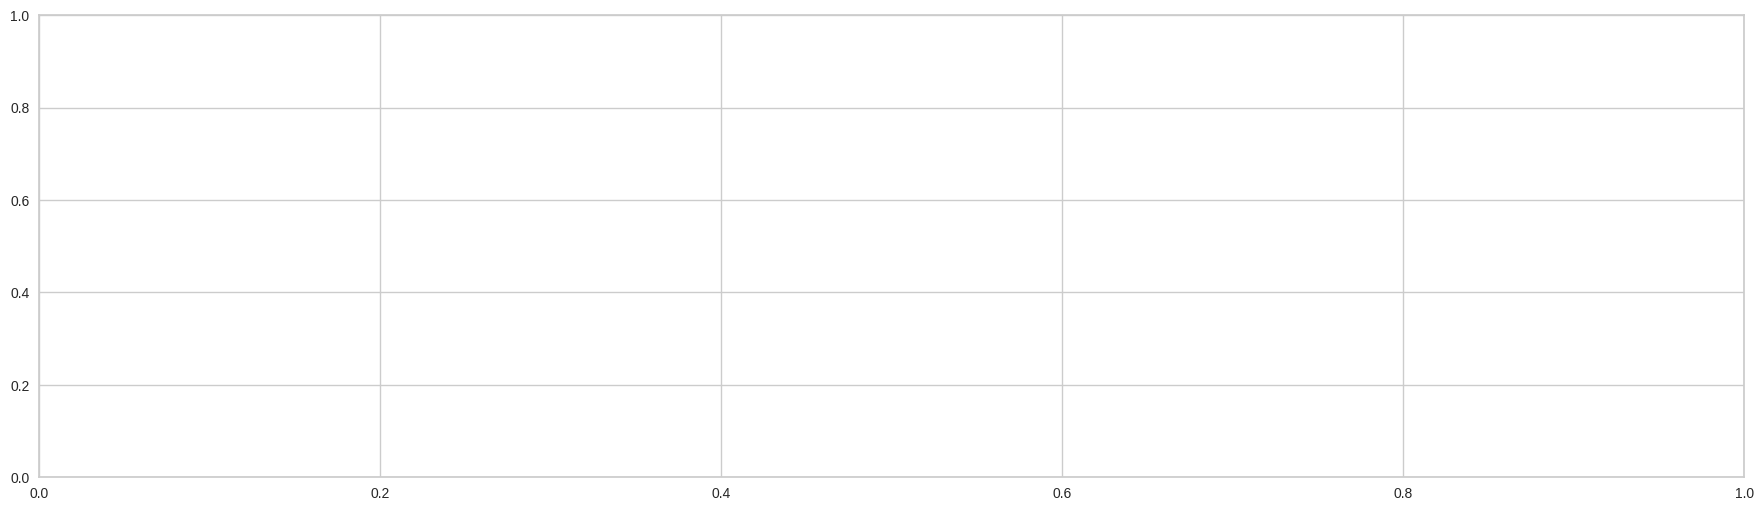

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
evaluate_model(best_model)

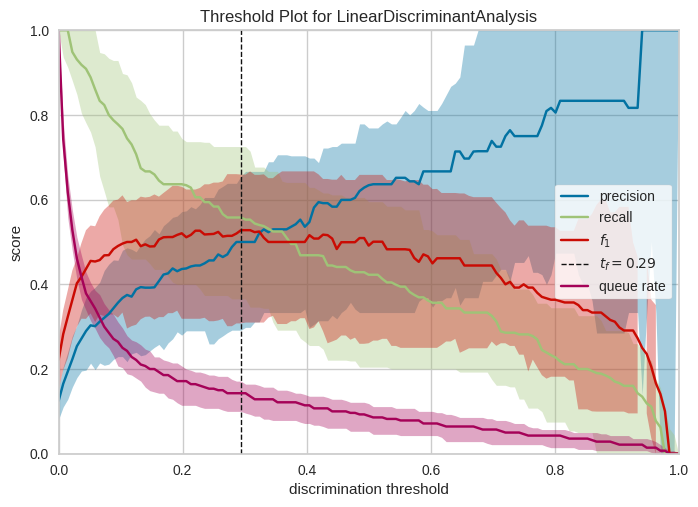

In [24]:
plot_model(best_model, plot = 'threshold',save=True)

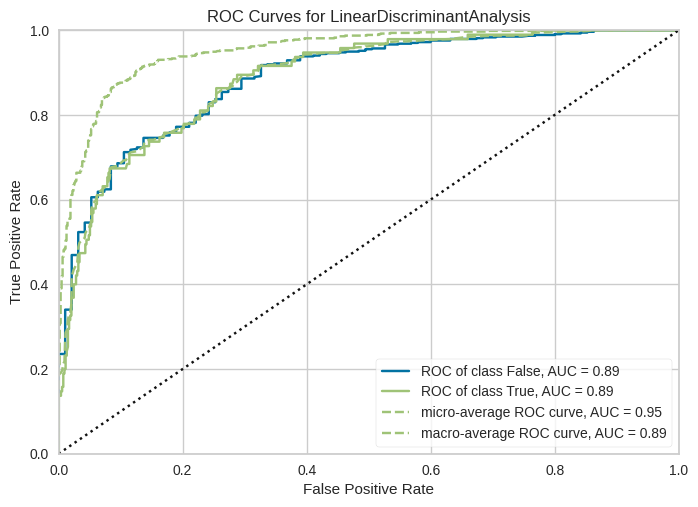

In [25]:
plot_model(best_model, plot = 'auc')

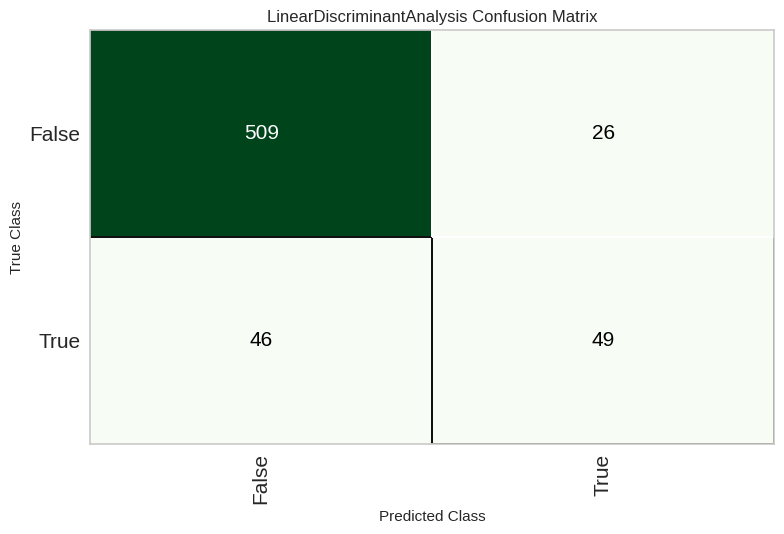

In [26]:
plot_model(best_model, plot = 'confusion_matrix')
#plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

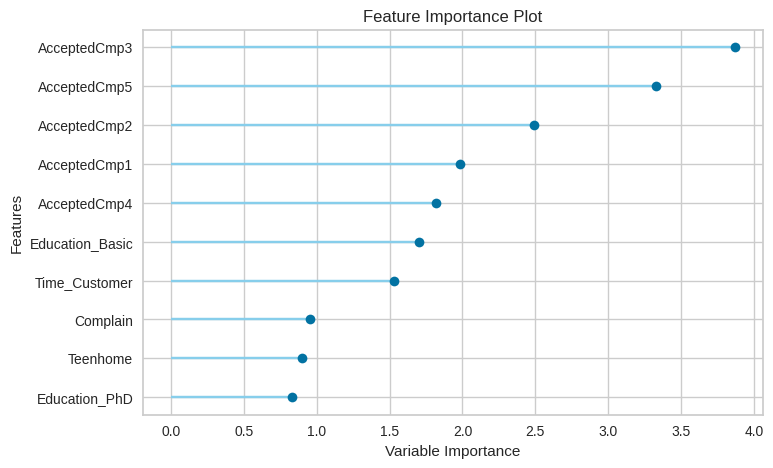

In [27]:
plot_model(best_model, plot = 'feature')

In [28]:
predict_model(best_model, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8857,0.8877,0.5158,0.6533,0.5765,0.5115,0.5162


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,64,0,PhD,67786,0,...,6,3,1,0,0,9.303408,True,0,0.7098,0.2902
1782,0,0,0,0,0,59,0,PhD,31686,1,...,3,1,6,31,1,8.810585,False,0,0.9918,0.0082
1944,0,0,0,0,0,73,0,PhD,59292,0,...,8,3,3,71,1,9.788017,False,0,0.9959,0.0041
1670,0,0,1,0,0,53,0,PhD,38097,1,...,2,3,7,70,1,10.447853,True,1,0.2426,0.7574
1219,0,0,0,0,0,47,0,Master,49681,0,...,7,7,7,66,2,9.393759,False,0,0.9979,0.0021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,48,0,Graduation,37085,1,...,3,3,8,65,1,8.753089,False,0,0.9986,0.0014
1923,1,0,0,0,0,58,0,Graduation,81168,0,...,7,6,3,84,0,8.889984,False,0,0.9766,0.0234
1523,0,0,0,0,0,45,0,2n Cycle,52195,2,...,2,1,8,2,1,8.876294,False,0,0.9775,0.0225
641,0,0,0,0,0,54,0,Graduation,4428,0,...,0,25,1,0,1,9.475896,False,0,0.7769,0.2231


* Outros tipos de plot:
https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

## Criando um Modelo

In [29]:
mdl_lda = create_model('lda')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:12:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Discriminant Analysis


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9116,0.8949,0.5909,0.7647,0.6667,0.6166,0.6235
1,0.9252,0.9396,0.6364,0.8235,0.7179,0.6756,0.6831
2,0.8912,0.8727,0.5000,0.6875,0.5789,0.5182,0.5269
3,0.8912,0.8855,0.5909,0.6500,0.6190,0.5557,0.5566
4,0.8980,0.9255,0.5909,0.6842,0.6341,0.5752,0.5773
5,0.8776,0.8738,0.4091,0.6429,0.5000,0.4341,0.4485
6,0.8844,0.8884,0.5455,0.6316,0.5854,0.5186,0.5205
7,0.8776,0.8938,0.4545,0.6250,0.5263,0.4580,0.4657
8,0.9116,0.9053,0.6522,0.7500,0.6977,0.6462,0.6483


In [30]:
mdl_lgbm = create_model('lightgbm')#, probability_threshold = 0)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/knd/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/knd/.local/lib/python3.10/site-packages/pycaret/internal/pipeline.py", line 260, in fit
    fitted_estimator = self._memory_fit(
  File "/home/knd/.local/lib/python3.10/site-packages/joblib/memory.py", line 594, in __call__
    return self._cached_call(args, kwargs)[0]
  File "/home/knd/.local/lib/python3.10/site-packages/pycaret/internal/memory.py", line 398, in _cached_call
    out, metadata = self.call(*args, **kwargs)
  File "/home/knd/.local/lib/python3.10/site-packages/pycaret/internal/memory.py", line 309, in call
    output = self.func(*args, **kwargs)
  File "/home/knd/.local/lib/python3.10/site-packages/pycaret/internal/pipeline.py", line 66, in _fit_one
    transformer.fit(*args, **fit_params)
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/sklearn.py", line 748, in fit
    self._Booster = train(
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 2605, in __init__
    train_set.construct()
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 1815, in construct
    self._lazy_init(self.data, label=self.label,
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 1474, in _lazy_init
    data, feature_name, categorical_feature, self.pandas_categorical = _data_from_pandas(data,
  File "/home/knd/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 594, in _data_from_pandas
    raise ValueError("DataFrame.dtypes for data must be int, float or bool.\n"
ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Age, Complain, Income, MntFishProducts, MntFruits, MntGoldProds, MntMeatProducts, MntSweetProducts, MntWines, Recency


## Tuning dos Hiperparâmetros

### LDA

In [44]:
tuned_lda = tune_model(mdl_lda)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:27:19
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Linear Discriminant Analysis


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9184,0.8945,0.5909,0.8125,0.6842,0.6387,0.6494
1,0.9320,0.9444,0.6364,0.8750,0.7368,0.6989,0.7106
2,0.8980,0.8789,0.5455,0.7059,0.6154,0.5577,0.5638
3,0.8844,0.8851,0.5455,0.6316,0.5854,0.5186,0.5205
4,0.8980,0.9255,0.5909,0.6842,0.6341,0.5752,0.5773
5,0.8844,0.8676,0.4091,0.6923,0.5143,0.4535,0.4738
6,0.8707,0.8924,0.4545,0.5882,0.5128,0.4397,0.4446
7,0.8776,0.8953,0.4545,0.6250,0.5263,0.4580,0.4657
8,0.9116,0.9078,0.6522,0.7500,0.6977,0.6462,0.6483


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
predict_model(tuned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8889,0.8885,0.5053,0.6761,0.5783,0.5159,0.5231


### LGBM

In [46]:
tuned_lgbm = tune_model(mdl_lgbm)

NameError: name 'mdl_lgbm' is not defined

In [ ]:
predict_model(tuned_lgbm)

NameError: name 'tuned_lgbm' is not defined

# Melhor Modelo: LGBM com tuning
* Foram comparados os modelos LGBM e RFC, antes e depois do tuning dos hiperparametros, e em ambas condições o LGBM apresentou melhores AUCs.

## AUC Plot

In [48]:
plot_model(tuned_lgbm, plot = 'auc')

NameError: name 'tuned_lgbm' is not defined

## Feature Importance

In [49]:
plot_model(tuned_lgbm, plot='feature')

NameError: name 'tuned_lgbm' is not defined

## Matriz de Confusão

In [50]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

NameError: name 'tuned_lgbm' is not defined

## Shap

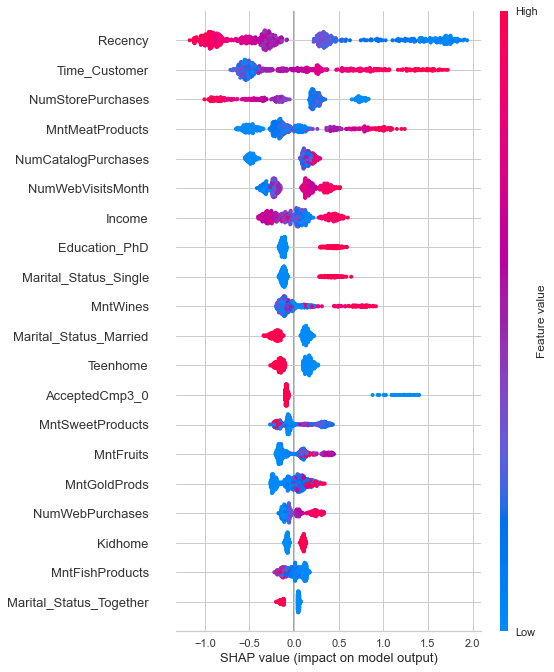

In [ ]:
interpret_model(tuned_lgbm)#, use_train_data = True)

In [ ]:
interpret_model(tuned_lgbm, plot = 'reason', observation = 1)

## Save Model

In [ ]:
save_model(tuned_lgbm, './deploy/pickle_lgbm_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Education',
                                                             'Marital_Status'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Kidhome', 'Teenhome',
                                                           'NumCatalogPurchases',
                                                           'NumDealsPurchases',
                                                           'NumStorePurchases',
                                                           'NumWebPurchases',
                                                           'NumWebVisitsMonth'],
                                       target='Response'...
                                 boosting_type='gbd

In [ ]:
cols_x_test = get_config(variable="X_test").columns
cols_x_test

Index(['Age', 'Income', 'Kidhome', 'MntFishProducts', 'MntFruits',
       'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'AcceptedCmp1_0', 'AcceptedCmp2_0', 'AcceptedCmp3_0',
       'AcceptedCmp4_0', 'AcceptedCmp5_0', 'Complain_0', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [ ]:
df_valid.drop('Response', axis = 1).to_csv('Xtest.csv', index = False)

In [47]:
df_valid

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response
0,0,0,0,0,0,39,0,Graduation,26646,1,...,11,0,2,4,2,6,26,0,9.125444,False
1,0,0,0,0,0,77,0,Graduation,37760,0,...,84,1,2,6,4,7,20,0,10.571059,False
2,0,0,0,0,0,38,0,Master,20559,1,...,13,0,2,3,2,8,88,0,10.042643,False
3,0,0,0,0,0,66,0,Graduation,65486,0,...,245,2,1,10,4,2,29,1,8.876295,False
4,0,0,0,0,0,59,0,Master,79143,0,...,650,9,1,13,6,3,2,0,10.625817,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,45,0,Basic,26487,1,...,2,1,3,3,2,5,23,0,9.853727,False
106,0,0,0,0,0,40,0,Master,89616,0,...,671,5,1,12,7,2,36,0,10.083712,True
107,0,0,0,0,0,76,0,Graduation,27469,0,...,9,0,1,3,0,6,2,0,10.650458,False
108,0,0,0,0,0,28,0,2n Cycle,80617,0,...,594,6,1,8,4,2,42,0,10.456067,False


# Referências:
* https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
* https://pycaret.gitbook.io/docs/get-started/quickstart#classification
* https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model